In [ ]:
import torch
import torch.nn as nn

x = torch.tensor([[1],[2],[3],[4],[5],[6],[7],[8]], dtype = torch.float32)
y = torch.tensor([[2],[4],[6],[8],[10],[12],[14],[16]],  dtype = torch.float32)

n_samples, n_features = x.shape

print (f"The number of samples be {n_samples}, with features {n_features}")





The number of samples be 8, with features 1


In [ ]:
# define moel

class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self,x):
      return self.linear(x)

input_size , output_size = n_features, n_features
x_test = torch.tensor([12], dtype = torch.float32)
model = LinearRegression(input_size, output_size)
print(f"Prediction before training : f({x_test.item()}) = {model(x_test).item():.3f}")


learning_rate = 0.01
epochs = 1000

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

for epoch in range(epochs):
  y_pred = model(x)

  l = loss(y, y_pred)

  l.backward()

  optimizer.step()

  optimizer.zero_grad()

  if (epoch+1)%10 == 0:
    w,b = model.parameters()
    print(f"epoch {epoch+1}, w = {w[0][0].item():.3f}, b = {b[0].item():.3f}")



Prediction before training : f(12.0) = 2.558
epoch 10, w = 2.083, b = -0.472
epoch 20, w = 2.081, b = -0.454
epoch 30, w = 2.078, b = -0.436
epoch 40, w = 2.074, b = -0.419
epoch 50, w = 2.072, b = -0.402
epoch 60, w = 2.069, b = -0.386
epoch 70, w = 2.066, b = -0.371
epoch 80, w = 2.063, b = -0.357
epoch 90, w = 2.061, b = -0.343
epoch 100, w = 2.059, b = -0.329
epoch 110, w = 2.056, b = -0.316
epoch 120, w = 2.054, b = -0.304
epoch 130, w = 2.052, b = -0.292
epoch 140, w = 2.050, b = -0.281
epoch 150, w = 2.048, b = -0.270
epoch 160, w = 2.046, b = -0.259
epoch 170, w = 2.044, b = -0.249
epoch 180, w = 2.043, b = -0.239
epoch 190, w = 2.041, b = -0.230
epoch 200, w = 2.039, b = -0.221
epoch 210, w = 2.038, b = -0.212
epoch 220, w = 2.036, b = -0.204
epoch 230, w = 2.035, b = -0.196
epoch 240, w = 2.033, b = -0.188
epoch 250, w = 2.032, b = -0.181
epoch 260, w = 2.031, b = -0.174
epoch 270, w = 2.030, b = -0.167
epoch 280, w = 2.029, b = -0.160
epoch 290, w = 2.027, b = -0.154
epoch 3

In [ ]:
 print(model(x_test))
 print(f"{x_test.item()} = {model(x_test).item():.3f}")

tensor([24.0102], grad_fn=<ViewBackward0>)
12.0 = 24.010


# **ANN**

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

input_size = 784 # 28*28
hidden_size = 500
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

print(device)

cuda


In [ ]:
train_dataset = torchvision.datasets.MNIST(root = "./data",
                                           train = True ,
                                           download = True,
                                           transform = transforms.ToTensor())
test_dataset = torchvision.datasets.MNIST(root = "./data",
                                          train = False,
                                          transform = transforms.ToTensor(),
                                          download = True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 16112137.49it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 487146.08it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4433971.45it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3236583.21it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = batch_size,
                                           shuffle = True
                                           )

test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                          batch_size = batch_size,
                                          shuffle = True
                                          )

In [ ]:
examples = iter(train_loader)
example_data, example_targets =next(examples)
print(example_data.shape)

torch.Size([100, 1, 28, 28])


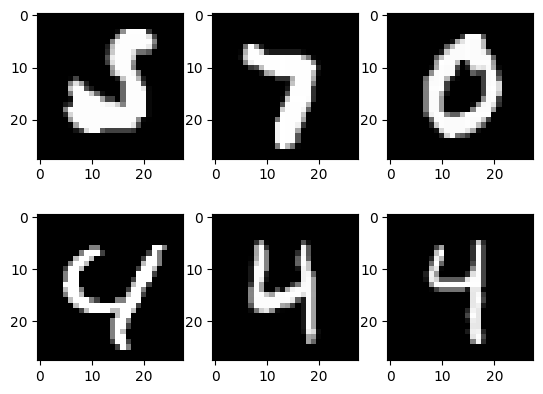

In [ ]:
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(example_data[i][0], cmap = "gray")

plt.show()

In [ ]:
class NeuralNet(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(NeuralNet, self).__init__()
    self.l1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.l2 = nn.Linear(hidden_size, num_classes)

  def forward(self, x):
    out = self.l1(x)
    out = self.relu(out)
    out = self.l2(out)
    return out

In [ ]:
print(len(train_loader))

600


In [ ]:
model = NeuralNet(input_size, hidden_size, num_classes).to(device)

criterion = nn.CrossEntropyLoss()
optimizer =  torch.optim.Adam(model.parameters(), lr = learning_rate)

n_total_steps = len(train_loader)

for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)

    outputs = model(images)
    loss = criterion(outputs, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i+1)%100 == 0:
      print(f"epoch {epoch+1}/{num_epochs}, step {i+1}/{n_total_steps}, loss = {loss.item():.4f}")

epoch 1/5, step 100/600, loss = 0.3804
epoch 1/5, step 200/600, loss = 0.1761
epoch 1/5, step 300/600, loss = 0.4124
epoch 1/5, step 400/600, loss = 0.2186
epoch 1/5, step 500/600, loss = 0.1890
epoch 1/5, step 600/600, loss = 0.2694
epoch 2/5, step 100/600, loss = 0.2506
epoch 2/5, step 200/600, loss = 0.0716
epoch 2/5, step 300/600, loss = 0.1727
epoch 2/5, step 400/600, loss = 0.0217
epoch 2/5, step 500/600, loss = 0.0631
epoch 2/5, step 600/600, loss = 0.0694
epoch 3/5, step 100/600, loss = 0.2798
epoch 3/5, step 200/600, loss = 0.0747
epoch 3/5, step 300/600, loss = 0.1326
epoch 3/5, step 400/600, loss = 0.0445
epoch 3/5, step 500/600, loss = 0.0308
epoch 3/5, step 600/600, loss = 0.0415
epoch 4/5, step 100/600, loss = 0.0153
epoch 4/5, step 200/600, loss = 0.0573
epoch 4/5, step 300/600, loss = 0.0731
epoch 4/5, step 400/600, loss = 0.0289
epoch 4/5, step 500/600, loss = 0.0295
epoch 4/5, step 600/600, loss = 0.0689
epoch 5/5, step 100/600, loss = 0.0074
epoch 5/5, step 200/600, 

In [ ]:
with torch.no_grad():
  n_correct = 0
  n_samples = len(test_loader.dataset)

  for images, labels in test_loader:
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)


    outputs = model(images)

    _, predictions = torch.max(outputs, 1)
    n_correct += (predictions == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
  print(f"Accuracy of the model on the {n_samples} test images: {acc}")

Accuracy of the model on the 10000 test images: 97.82


# **CNN**

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision.transforms import transforms
import matplotlib.pyplot as plt
import numpy as np

100%|██████████| 170498071/170498071 [00:02<00:00, 59816100.41it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


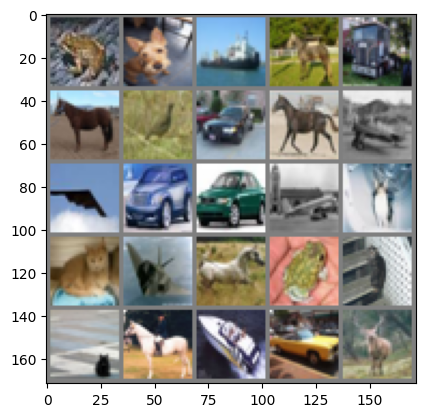

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

epochs = 10
batch_size = 32
learning_rate = 0.001

# the composed transformation first converts an image to a tensor and then normalizes the pixel values so that they have a mean 0 and SD 1
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])

# we will use CIFAR10 data set 6000 32*32 colour images 10 classes with 6000 images per class

train_dataset = torchvision.datasets.CIFAR10(root="./data",
                                             train = True,
                                             download = True,
                                             transform = transform)

test_dataset = torchvision.datasets.CIFAR10(root="./data",
                                            download = True,
                                            train = False ,
                                            transform = transform)

train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = batch_size,
                                           shuffle = True)

test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                          batch_size = batch_size,
                                          shuffle = True)

classes = ("plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")

def imshow(img):
  img = img/2 + 0.5
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1,2,0)))
  plt.show()

detailer = iter(train_loader)
images, labels = next(detailer)
img_grid = torchvision.utils.make_grid(images[0:25], nrow=5)
imshow(img_grid)

In [ ]:
class ConvNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(in_channels = 3, out_channels = 32, kernel_size = 3)
    self.pool = nn.MaxPool2d(kernel_size = 2, stride = 2)
    self.Conv2 = nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = 3)
    self.conv3 = nn.Conv2d(in_channels = 64, out_channels = 64, kernel_size = 3)
    self.fc1 = nn.Linear(64*4*4, 64)
    self.fc2 = nn.Linear(64, 10)

  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = self.pool(x)
    x = F.relu(self.Conv2(x))
    x = self.pool(x)
    x = F.relu(self.conv3(x))
    x = torch.flatten(x,1)
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    return x


In [ ]:
model = ConvNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

n_total_steps = len(train_loader)
for epoch in range(epochs):
  running_loss = 0.0
  for i, (images, labels) in enumerate(train_loader):
    images = images.to(device)
    labels = labels.to(device)

    output = model(images)
    loss = criterion(output, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step

    running_loss = running_loss + loss.item()

  print(f"[{epoch+1}], loss = {running_loss/n_total_steps :.3f}")

PATH = "./cnn.pth"
torch.save(model.state_dict(), PATH)


[1], loss = 2.306
[2], loss = 2.306
[3], loss = 2.306
[4], loss = 2.306
[5], loss = 2.306
[6], loss = 2.306
[7], loss = 2.306
[8], loss = 2.306
[9], loss = 2.306
[10], loss = 2.306


In [ ]:
loaded_model = ConvNet()
loaded_model.load_state_dict(torch.load(PATH))
loaded_model.to(device)
loaded_model.eval()

with torch.no_grad():
  n_correct = 0
  n_samples = len(test_loader.dataset)

  for images, labels in test_loader:
    images = images.to(device)
    labels = labels.to(device)


    outputs = model(images)
    _, predictions = torch.max(outputs, 1)
    n_correct += (predictions == labels).sum().item()


  acc = 100.0 * n_correct / n_samples
  print(f"Accuracy of the model on the {n_samples} test images: {acc} %")

Accuracy of the model on the 10000 test images: 10.01 %
